## Table of Content

1. Objective

2. Data Dictionary of Dataset

3. Import Important Libraries

4. Import Dataset and EDA
   4.1. Import Dataset and analysis using "ydata_profiling"
   4.2. Exploratory Data Analysis (EDA)

5. Split Dataset for Training and Testing
   5.1. Separate X, Y values
   5.2. Split Dataset for Training and Testing

6. Train and Test with Different Algorithms

7. Create Function for Accuracy
   7.1. Create function to make DataFrame for all Accuracy
   7.2. Plot Accuracy
   7.3. Accuracy Analysis

8. Check Outliers

9. Feature Engineering
   9.1. Feature Selection using "SelectKBest"
   9.2. ExtraTreesClassifier

10. Scaling
    10.1. MinMaxScaler
        10.1.1 Train and Test for Scaled Data

11. Analysis Summary

12. Model Save and Revalidate

13. Conclusion


# Objective 

Performing classification to determine whether individuals are diseased or not based on the provided data, the model with the highest accuracy 

will be selected as the optimal choice.

## Data Dictionary of Dataset

1. age: Age of persons
2. sex: Gender of persons
3. cp: Chest pain type (4 values)
4. trtbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardio results (values 0, 1, 2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise-induced angina
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 0=normal, 1=fixed defect, 2=reversible defect
14. target: Target column, 1 = Diseased, 0 = Not Diseased

Complete attribute documentation:

- **age**: age of persons
- **sex**: gender of persons (1 = male; 0 = female)
- **cp**: chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: serum cholesterol in mg/dl
- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg**: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: maximum heart rate achieved
- **exang**: Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: the slope of the peak exercise ST segment
  - Value 0: upsloping
  - Value 1: flat
  - Value 2: downsloping
- **ca**: number of major vessels (0-3) colored by fluoroscopy
- **thall**: Dipyridamole-Thallium scan results
  - Value 0: Null value
  - Value 1: Normal blood flow
  - Value 2: Fixed defect (no blood flow in some part of the heart)
  - Value 3: Reversible defect (a blood flow is observed but it is not normal)


##  Import Important Library

In [68]:
!pip install ydata-profiling


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
!pip show ydata-profiling


Name: ydata-profiling
Version: 4.9.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: C:\Users\tejar\desktop\onlyresume\mlp1r\venv\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [70]:
!pip install streamlit


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
!pip show streamlit

Name: streamlit
Version: 1.37.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\tejar\desktop\onlyresume\mlp1r\venv\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [72]:
!pip install xgboost


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from ydata_profiling import ProfileReport

# Import Different Algorithms
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Check if plot_confusion_matrix is available, if not, import it from sklearn.metrics.plot_confusion_matrix
try:
    from sklearn.metrics import plot_confusion_matrix
except ImportError:
    from sklearn.metrics import ConfusionMatrixDisplay
    def plot_confusion_matrix(estimator, X, y):
        cm = confusion_matrix(y, estimator.predict(X))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

# Check if plot_precision_recall_curve is available, if not, import it from sklearn.metrics.plot_precision_recall_curve
try:
    from sklearn.metrics import plot_precision_recall_curve
except ImportError:
    from sklearn.metrics import PrecisionRecallDisplay
    def plot_precision_recall_curve(estimator, X, y):
        precision, recall, _ = precision_recall_curve(y, estimator.predict_proba(X)[:, 1])
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
        pr_display.plot()
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

# Check if plot_roc_curve is available, if not, import it from sklearn.metrics.plot_roc_curve
try:
    from sklearn.metrics import plot_roc_curve
except ImportError:
    from sklearn.metrics import RocCurveDisplay
    def plot_roc_curve(estimator, X, y):
        fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        roc_display.plot()
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()

## Import Dataset and EDA

####  Import Dataset and analysis using "ydata_profiling" 

In [74]:
df=pd.read_csv('data\heart.csv')

In [75]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


####  Exploratory Data Analysis (EDA)

In [76]:
profile = ProfileReport(df, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

In [77]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [80]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [81]:
No_HeartDisease  = ( 526/1025) * 100
HeartDisease =  ( 499/1025) * 100

print('HeartDisease present are {} percent of total people\'s of datasets'.format(HeartDisease))
print('No HeartDisease are {} percent of total people\'s of datasets'.format(No_HeartDisease))


HeartDisease present are 48.68292682926829 percent of total people's of datasets
No HeartDisease are 51.31707317073171 percent of total people's of datasets


In [82]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [83]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [84]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'cp' variable:  ",end=" ")
print(df['cp'].unique())

print("Categories in'fbs' variable:",end=" " )
print(df['fbs'].unique())

print("Categories in 'restecg' variable:     ",end=" " )
print(df['restecg'].unique())

print("Categories in 'exang' variable:     ",end=" " )
print(df['exang'].unique())

print("Categories in 'slope' variable:     ",end=" " )
print(df['slope'].unique())


print("Categories in 'ca' variable:     ",end=" " )
print(df['ca'].unique())

print("Categories in 'thal' variable:     ",end=" " )
print(df['thal'].unique())

Categories in 'sex' variable:      [1 0]
Categories in 'cp' variable:   [0 1 2 3]
Categories in'fbs' variable: [0 1]
Categories in 'restecg' variable:      [1 0 2]
Categories in 'exang' variable:      [0 1]
Categories in 'slope' variable:      [2 0 1]
Categories in 'ca' variable:      [2 0 1 3 4]
Categories in 'thal' variable:      [3 2 1 0]


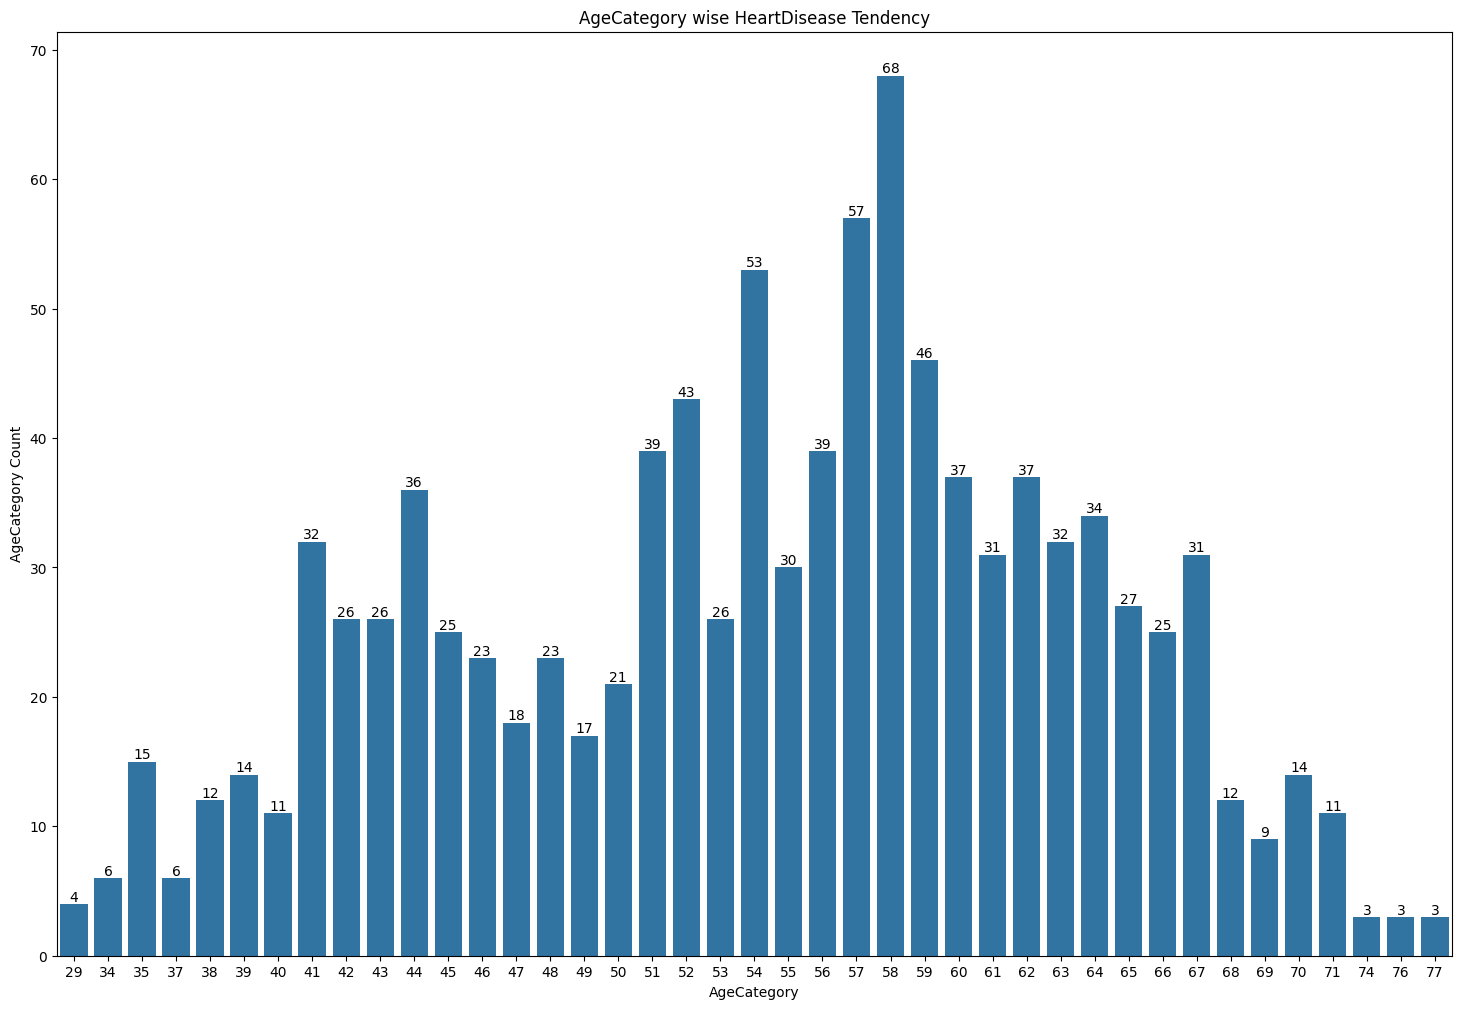

In [85]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

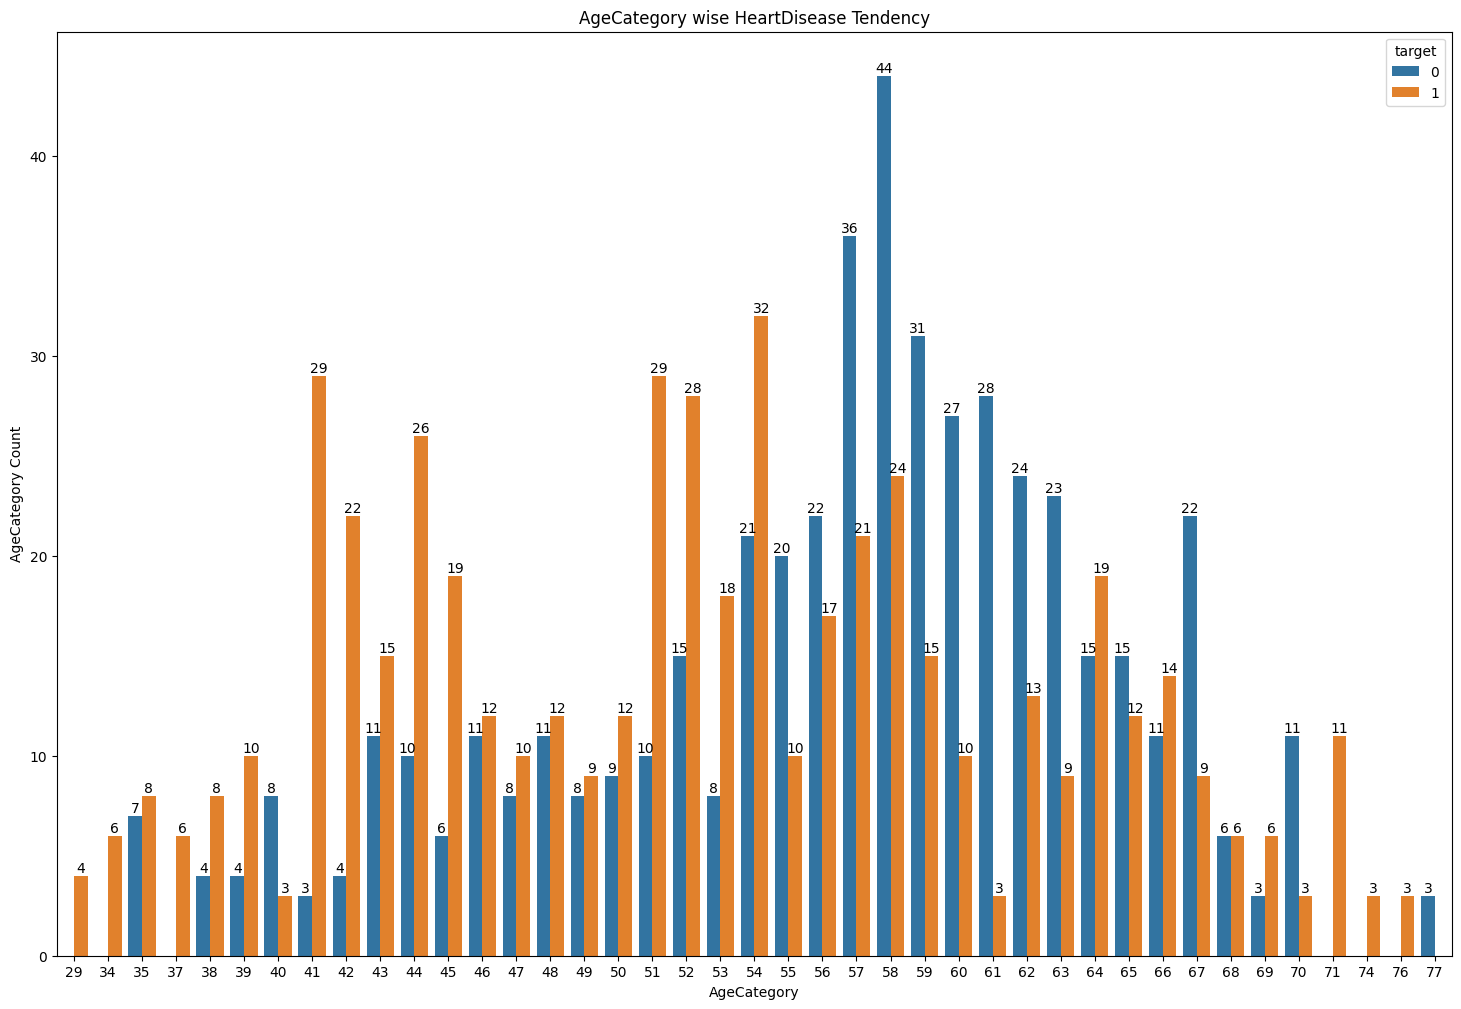

In [86]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age',hue='target', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [87]:
features=df.columns

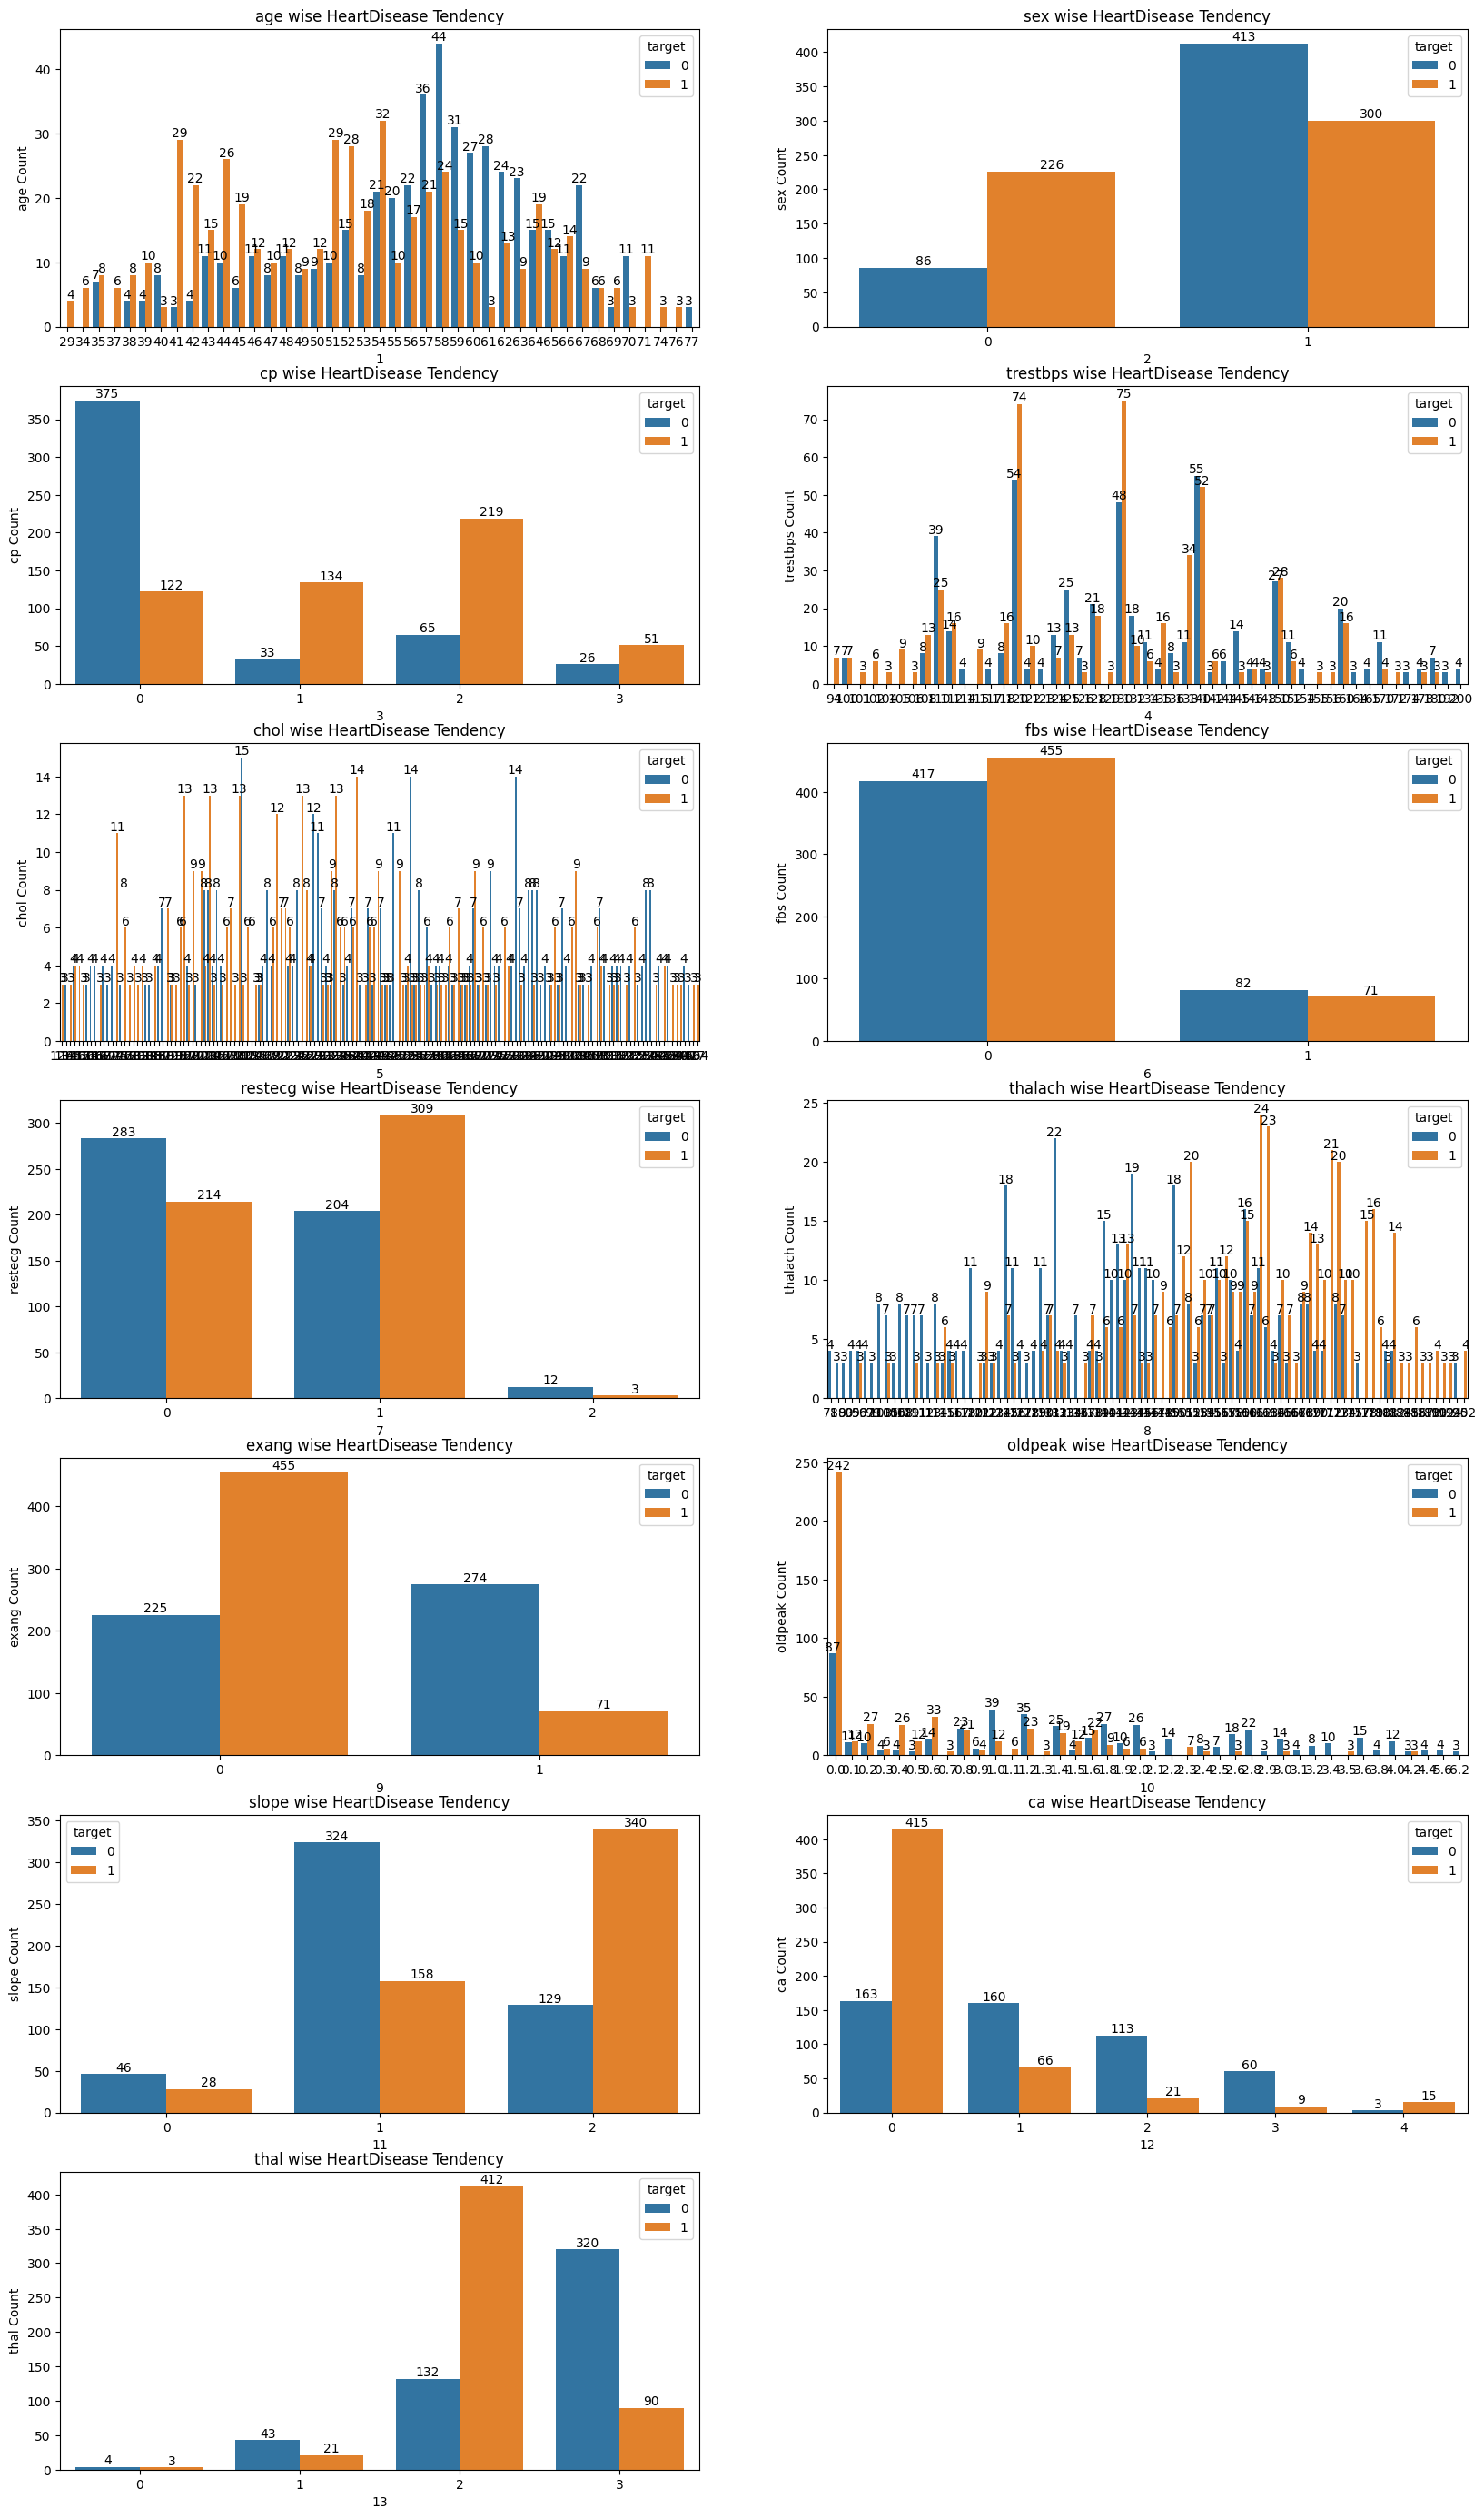

In [88]:
plt.figure(figsize=(20,40))
for i in range(1,14):
    plt.subplot(8,2,i)
    ax=sns.countplot(x=features[i-1],hue='target',data=df)
    ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(features[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(features[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

##### High Probability of Heart Disease:

Female Person

Chest pain type (CP) > Value 1: typical angina

The slope of the peak exercise ST segment (slp) > Value 2: downsloping

(thall) Dipyridamole-Thallium scan results > Value 2: Fixed defect (no blood flow in some part of the heart)

In [89]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

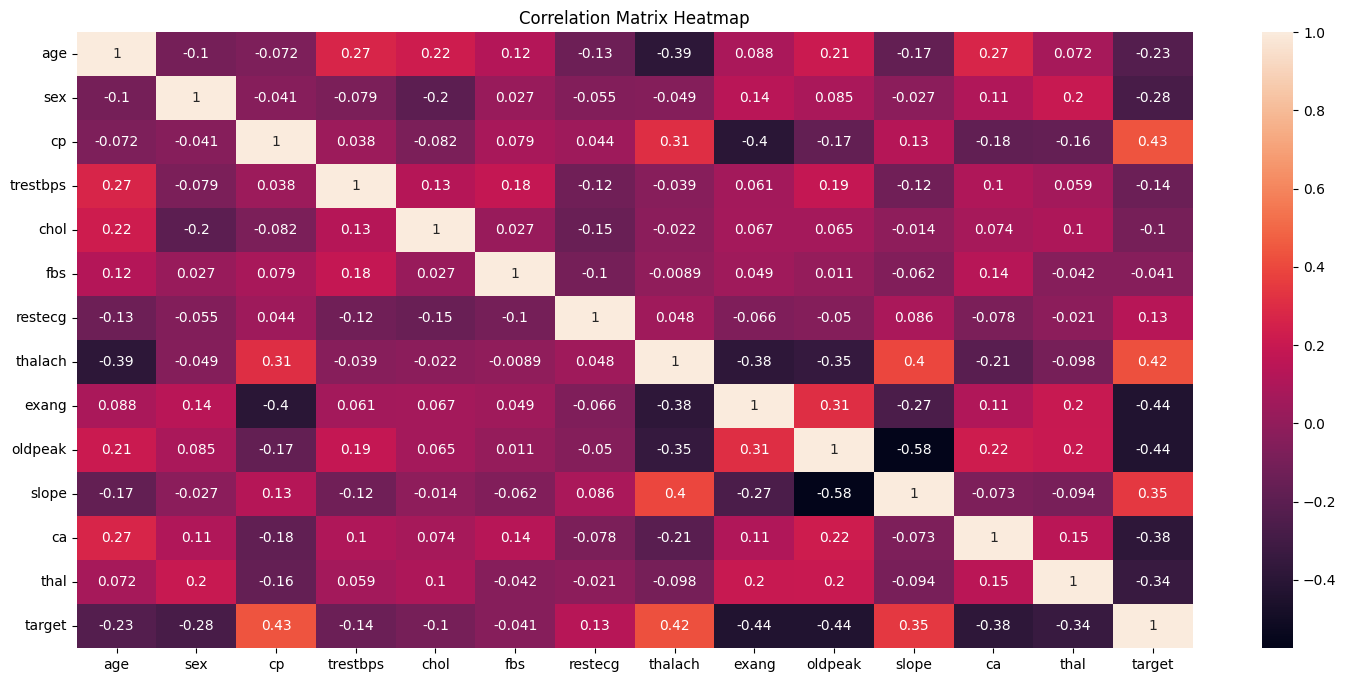

In [90]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),annot=True)
plt.title('Correlation Matrix Heatmap')

In [91]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##  Separate X, Y values And Split Dataset for Training and Testing

 ####  Separate X, Y values 

In [92]:
X=df.drop('target',axis=1)

In [93]:
Y=df['target']

In [94]:
X.shape

(1025, 13)

In [95]:
Y.shape

(1025,)

####  Split Dataset for Training and Testing 

#### Try to find best random state

In [96]:
from sklearn.model_selection import train_test_split as tts

In [97]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=14)
Xtest.shape


(308, 13)

## Train and Test with Different Algorithm

#### Logistic Regression

In [98]:
# logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score
logR=LogisticRegression()
logR.fit(Xtrain,Ytrain)
logR_predict=logR.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,logR_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,logR_predict),"\n")

con_matrix:  
 [[116  35]
 [ 16 141]] 

Accuracy:  
 0.8344155844155844 



In [99]:
model_list=[]
accuracy_list=[]

In [100]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split as tts, GridSearchCV
logR=LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}
lrgrid_search = GridSearchCV(estimator=logR, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
lrgrid_search.fit(Xtrain, Ytrain)
# beat perameters
best_logR = lrgrid_search.best_estimator_

# y_pred
logR_predict = best_logR.predict(Xtest)
print("Best Hyperparameters:", lrgrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, logR_predict))
print("Accuracy:\n", accuracy_score(Ytest, logR_predict))
print("Classification Report:\n", classification_report(Ytest, logR_predict))
model_list.append(lrgrid_search)
accuracy_list.append(accuracy_score(Ytest, logR_predict))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}
Confusion Matrix:
 [[115  36]
 [ 16 141]]
Accuracy:
 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       151
           1       0.80      0.90      0.84       157

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308



#### SVM

In [101]:
# svm
svc = SVC()
svc.fit(Xtrain,Ytrain)
svc_predict=svc.predict(Xtest)

print("con_matrix: ",'\n',confusion_matrix(Ytest,svc_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,svc_predict),"\n")

con_matrix:  
 [[ 90  61]
 [ 31 126]] 

Accuracy:  
 0.7012987012987013 



In [102]:
# svm
svc=SVC()
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}


svcgrid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
svcgrid_search.fit(Xtrain, Ytrain)

# best
best_svc = svcgrid_search.best_estimator_

# y_pred
svc_predict = best_svc.predict(Xtest)


print("Best Hyperparameters:", svcgrid_search.best_params_)


# confusion matrix and accuracy
print("Confusion Matrix:\n", confusion_matrix(Ytest, svc_predict))
print("Accuracy:\n", accuracy_score(Ytest, svc_predict))

print("Classification Report:\n", classification_report(Ytest, svc_predict))
model_list.append(svcgrid_search)
accuracy_list.append(accuracy_score(Ytest, svc_predict))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Hyperparameters: {'C': 1000, 'gamma': 0.001}
Confusion Matrix:
 [[148   3]
 [  9 148]]
Accuracy:
 0.961038961038961
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.98      0.94      0.96       157

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



### KNN

In [103]:
#KNN
knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
knn_predict=knn.predict(Xtest)

print("con_matrix: ",'\n',confusion_matrix(Ytest,knn_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,knn_predict),"\n")

con_matrix:  
 [[114  37]
 [ 47 110]] 

Accuracy:  
 0.7272727272727273 



In [104]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski','jaccard']
}


knngrid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
knngrid_search.fit(Xtrain, Ytrain)

best_knn = knngrid_search.best_estimator_

knn_predict = best_knn.predict(Xtest)

print("Best Hyperparameters:", knngrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, knn_predict))
print("Accuracy:\n", accuracy_score(Ytest, knn_predict))
print("Classification Report:\n", classification_report(Ytest, knn_predict))
model_list.append(knngrid_search)
accuracy_list.append(accuracy_score(Ytest, knn_predict))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Confusion Matrix:
 [[148   3]
 [ 13 144]]
Accuracy:
 0.948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       151
           1       0.98      0.92      0.95       157

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



### Decision Tree

In [105]:
# DecisionTree
dtclf=DecisionTreeClassifier()
dtclf.fit(Xtrain,Ytrain)
dtclf_predict=dtclf.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,dtclf_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,dtclf_predict),"\n")

con_matrix:  
 [[151   0]
 [  3 154]] 

Accuracy:  
 0.9902597402597403 



In [106]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None,1, 2, 3, 4, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

dtgrid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
dtgrid_search.fit(Xtrain, Ytrain)

best_dt = dtgrid_search.best_estimator_


dt_predict = best_dt.predict(Xtest)


print("Best Hyperparameters:", dtgrid_search.best_params_)


print("Confusion Matrix:\n", confusion_matrix(Ytest, dt_predict))
print("Accuracy:\n", accuracy_score(Ytest, dt_predict))

print("Classification Report:\n", classification_report(Ytest, dt_predict))
model_list.append(dtgrid_search)
accuracy_list.append(accuracy_score(Ytest, dt_predict))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
Confusion Matrix:
 [[151   0]
 [  0 157]]
Accuracy:
 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       157

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



### RandomForest

In [107]:
# RandomForest
rfclf = RandomForestClassifier()
rfclf.fit(Xtrain,Ytrain)
rfclf_predict=rfclf.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,rfclf_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,rfclf_predict),"\n")

con_matrix:  
 [[151   0]
 [  6 151]] 

Accuracy:  
 0.9805194805194806 



In [108]:
rf = RandomForestClassifier()

param_grid = {
    
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}

rfgrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
rfgrid_search.fit(Xtrain, Ytrain)

best_rf = rfgrid_search.best_estimator_

rf_predict = best_rf.predict(Xtest)

print("Best Hyperparameters:", rfgrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, rf_predict))
print("Accuracy:\n", accuracy_score(Ytest, rf_predict))
print("Classification Report:\n", classification_report(Ytest, rf_predict))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 50}
Confusion Matrix:
 [[151   0]
 [  6 151]]
Accuracy:
 0.9805194805194806
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       151
           1       1.00      0.96      0.98       157

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



### Adaboost

In [109]:
# Adaboost
ada=AdaBoostClassifier()
ada.fit(Xtrain,Ytrain)
ada_predict=ada.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,ada_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,ada_predict),"\n")

con_matrix:  
 [[131  20]
 [ 18 139]] 

Accuracy:  
 0.8766233766233766 



In [110]:

ada = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

adagrid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
adagrid_search.fit(Xtrain, Ytrain)

best_ada = adagrid_search.best_estimator_

ada_predict = best_ada.predict(Xtest)

print("Best Hyperparameters:", adagrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, ada_predict))
print("Accuracy:\n", accuracy_score(Ytest, ada_predict))
print("Classification Report:\n", classification_report(Ytest, ada_predict))
model_list.append("AdaBoostClassifier")
accuracy_list.append(accuracy_score(Ytest, ada_predict))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 200}
Confusion Matrix:
 [[149   2]
 [ 14 143]]
Accuracy:
 0.948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       151
           1       0.99      0.91      0.95       157

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



### GradientBoosting

In [111]:
# GradientBoosting
gBoost=GradientBoostingClassifier(max_depth=2,ccp_alpha=0.01)
gBoost.fit(Xtrain,Ytrain)
gBoost_predict=gBoost.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,gBoost_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,gBoost_predict),"\n")


con_matrix:  
 [[118  33]
 [ 18 139]] 

Accuracy:  
 0.8344155844155844 



In [112]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

gbgrid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
gbgrid_search.fit(Xtrain, Ytrain)

best_gb = gbgrid_search.best_estimator_

gb_predict = best_gb.predict(Xtest)

print("Best Hyperparameters:", gbgrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, gb_predict))
print("Accuracy:\n", accuracy_score(Ytest, gb_predict))
print("Classification Report:\n", classification_report(Ytest, gb_predict))
model_list.append(gbgrid_search)
accuracy_list.append(accuracy_score(Ytest, gb_predict))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Confusion Matrix:
 [[151   0]
 [  3 154]]
Accuracy:
 0.9902597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       157

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



### Xgboost

In [113]:
# Xgboost
xgb = XGBClassifier(max_depth=2, n_estimators=10)
xgb.fit(Xtrain,Ytrain)
xgb_predict=xgb.predict(Xtest)
print("con_matrix: ",'\n',confusion_matrix(Ytest,xgb_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,xgb_predict),"\n")

con_matrix:  
 [[120  31]
 [ 16 141]] 

Accuracy:  
 0.8474025974025974 



In [114]:
Xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
610,43,0,0,132,341,1,0,136,1,3.0,1,0,3
85,44,1,1,120,220,0,1,170,0,0.0,2,0,2
914,66,1,0,112,212,0,0,132,1,0.1,2,1,2
948,70,1,0,145,174,0,1,125,1,2.6,0,0,3
169,45,0,1,112,160,0,1,138,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,57,1,0,150,276,0,0,112,1,0.6,1,1,1
406,58,1,2,140,211,1,0,165,0,0.0,2,0,2
268,58,1,2,132,224,0,0,173,0,3.2,2,2,3
344,41,1,1,120,157,0,1,182,0,0.0,2,0,2


In [115]:
xg =XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

xgbgrid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
xgbgrid_search.fit(Xtrain, Ytrain)

best_xg = xgbgrid_search.best_estimator_

xg_predict = best_xg.predict(Xtest)

print("Best Hyperparameters:", xgbgrid_search.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, xg_predict))
print("Accuracy:\n", accuracy_score(Ytest, xg_predict))
print("Classification Report:\n", classification_report(Ytest, xg_predict))
accuracy_list.append(accuracy_score(Ytest, knn_predict))
model_list.append(xgbgrid_search)
accuracy_list.append(100)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Confusion Matrix:
 [[151   0]
 [  3 154]]
Accuracy:
 0.9902597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       157

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



 ##  Function for Accuracy

In [116]:
def model(Xtrain,Xtest,Ytrain,Ytest):
    model_name=['SVM Classifier(SVC)','XGBClassifier',
                'AdaBoostClassifier','GradientBoostingClassifier',
                'DecisionTreeClassifier','RandomForest Classifier','KNNClassification','LogisticRegression']
    accuracy=[]
    
    #SVM Classifier(SVC)
    best_svc.fit(Xtrain,Ytrain)
    svc_predict=best_svc.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,svc_predict)) 
    print("Complete SVM Classifier(SVC) !")    
                            
    #XGBClassifier
    best_xg.fit(Xtrain,Ytrain)
    xgb_predict=best_xg.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,xgb_predict))
    print("Complete XGBClassifier !")
                            
    #AdaBoostClassification
    best_ada.fit(Xtrain,Ytrain)
    ada_predict=best_ada.predict(Xtest)
    accuracy.append(accuracy_score(Ytest, ada_predict))
    print("Complete AdaBoostClassification !")
                            
    #GradientBoostingClassifier
    best_gb.fit(Xtrain,Ytrain)
    gBoost_predict=best_gb.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,gBoost_predict))
    print("Complete GradientBoostingClassifier !") 
                            
    #DecisionTreeClassifier
    best_dt.fit(Xtrain,Ytrain)
    dtclf_predict=best_dt.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,dtclf_predict))
    print("Complete DecisionTreeClassifier !") 
                              
    #RandomForestClassifier
    best_rf.fit(Xtrain,Ytrain)
    rfclf_predict=best_rf.predict(Xtest)
    accuracy.append(accuracy_score(Ytest, rfclf_predict))
    print("Complete RandomForestClassifier !") 
    
    #KNNClassification
    best_knn.fit(Xtrain,Ytrain)
    knn_predict=best_knn.predict(Xtest)
    accuracy.append(accuracy_score(Ytest, knn_predict))
    print("Complete KNNClassification !")
    
    #LogisticRegression
    best_logR.fit(Xtrain,Ytrain)
    logR_predict=best_logR.predict(Xtest)
    accuracy.append(accuracy_score(Ytest,logR_predict))
    print("Complete LogisticRegression !")
    
    return model_name,accuracy

In [117]:
model_name,accuracy=model(Xtrain,Xtest,Ytrain,Ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [118]:
model_name,accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.961038961038961,
  0.9902597402597403,
  0.948051948051948,
  0.9902597402597403,
  1.0,
  0.9805194805194806,
  0.948051948051948,
  0.8311688311688312])

####  Dataframe for all Accuracy 

In [119]:
df_allgo_accuracy=pd.DataFrame(list(zip(model_name, accuracy)), columns=['Model Name', 'Accuracy'])
df_allgo_accuracy

,Model Name,Accuracy
0,SVM Classifier(SVC),0.961039
1,XGBClassifier,0.990260
2,AdaBoostClassifier,0.948052
3,GradientBoostingClassifier,0.990260
4,DecisionTreeClassifier,1.000000
5,RandomForest Classifier,0.980519
6,KNNClassification,0.948052
7,LogisticRegression,0.831169


#### Plot Accuracy 

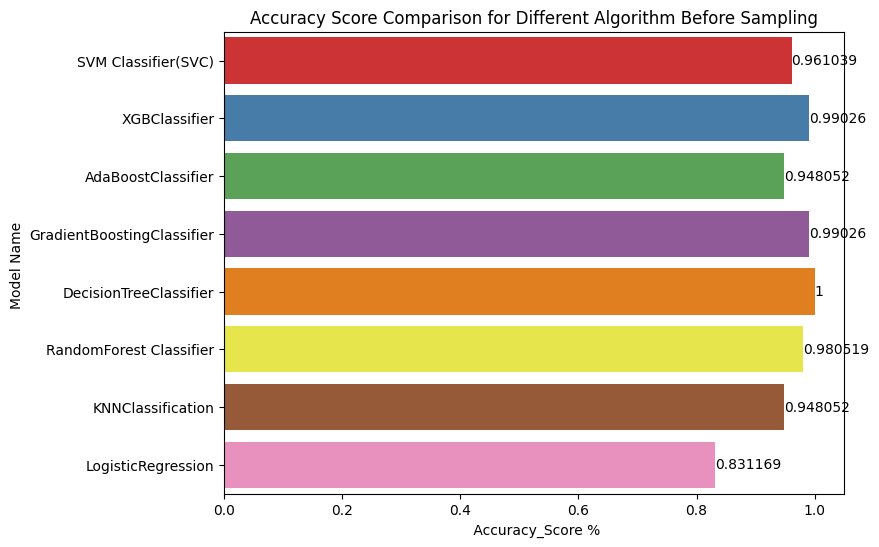

In [120]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Model Name',x='Accuracy',data=df_allgo_accuracy, palette='Set1')
for i in ax.containers:
    ax.bar_label(i)
    

ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Model Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm Before Sampling")


plt.show()

 ####  Accuracy Analysis 

In [121]:
# For LogR
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, roc_auc_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ytest, logR_predict)

print(classification_report(Ytest, logR_predict))
con_matrix = confusion_matrix(Ytest, logR_predict)
print("Confusion Matrix: \n", con_matrix, "\n")
logR_accuracy = accuracy_score(Ytest, logR_predict)
print("Accuracy Score: ", logR_accuracy)
logR_auc = roc_auc_score(Ytest, logR_predict)
print("ROC AUC Score: ", logR_auc)



              precision    recall  f1-score   support

           0       0.88      0.76      0.82       151
           1       0.80      0.90      0.84       157

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308

Confusion Matrix: 
 [[115  36]
 [ 16 141]] 

Accuracy Score:  0.8311688311688312
ROC AUC Score:  0.8298392879740162


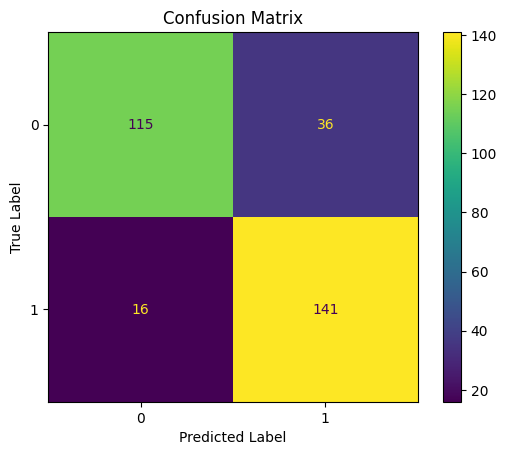

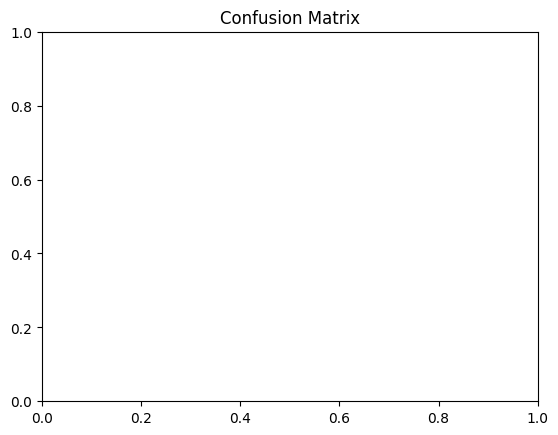

In [122]:
# Plot Confusion Matrix
plot_confusion_matrix(best_logR, Xtest, Ytest)
plt.title("Confusion Matrix")
plt.show()

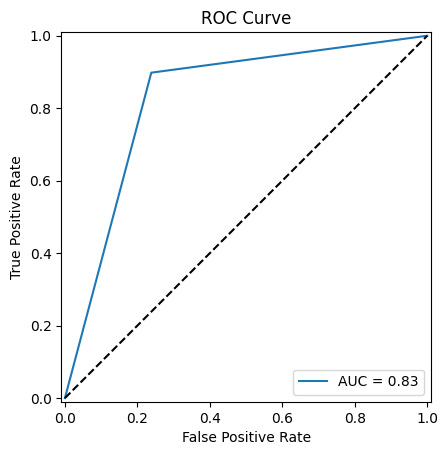

In [123]:
# Plot ROC Curve
fpr, tpr, thersolds = roc_curve(Ytest, logR_predict)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.show()

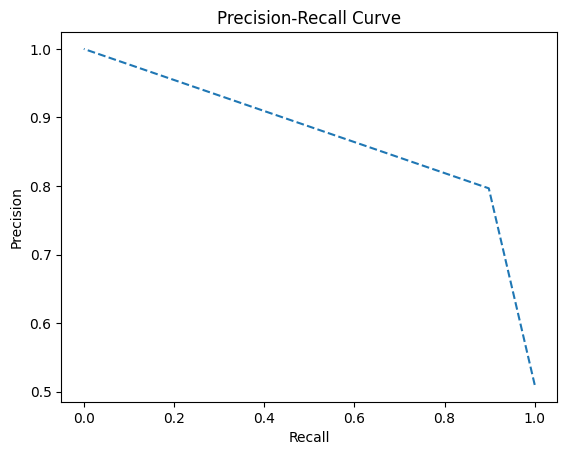

In [124]:
# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Ytest, logR_predict)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

##  Check Outlier

<Axes: >

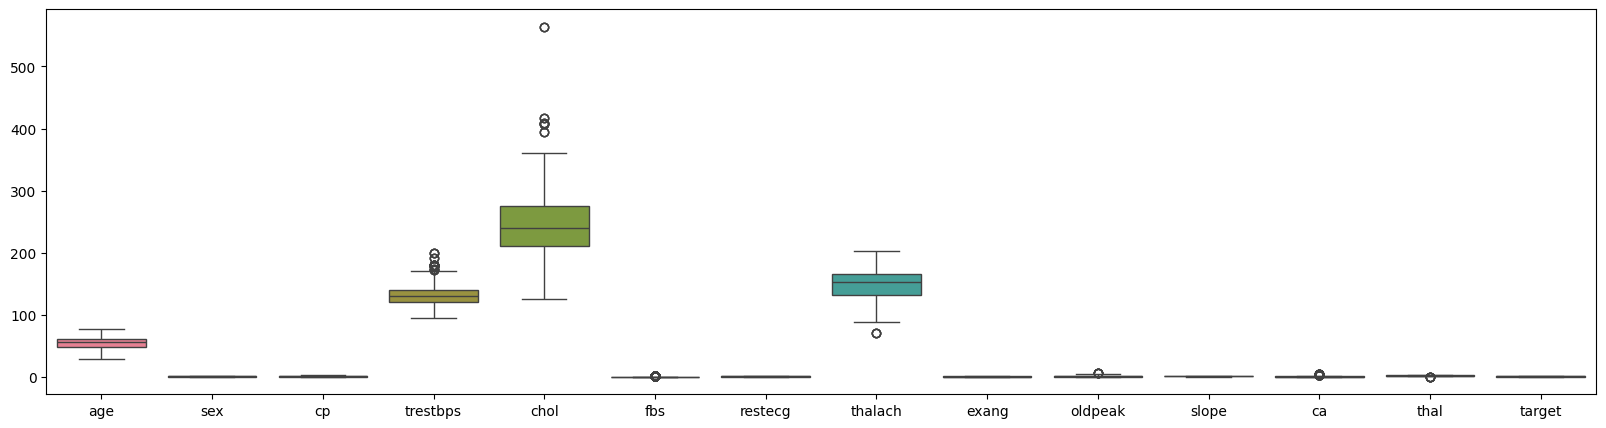

In [125]:
plt.figure(figsize = (20,5))
sns.boxplot(df)
# for outliers

 ##  Feature Engineering to enhance the accuracy

In [126]:
# New train-test-split
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.30,random_state=42)

#### Feature Selection using "SelectKBest"

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(X_train,Y_train)

SelectKBest()

#### nbest 6 features

In [128]:
col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
9,oldpeak,178.623608
2,cp,165.804930
7,thalach,159.892044
8,exang,139.154663
11,ca,127.561465
12,thal,106.655892


#### Feature Selection using ExtraTreesClassifier 

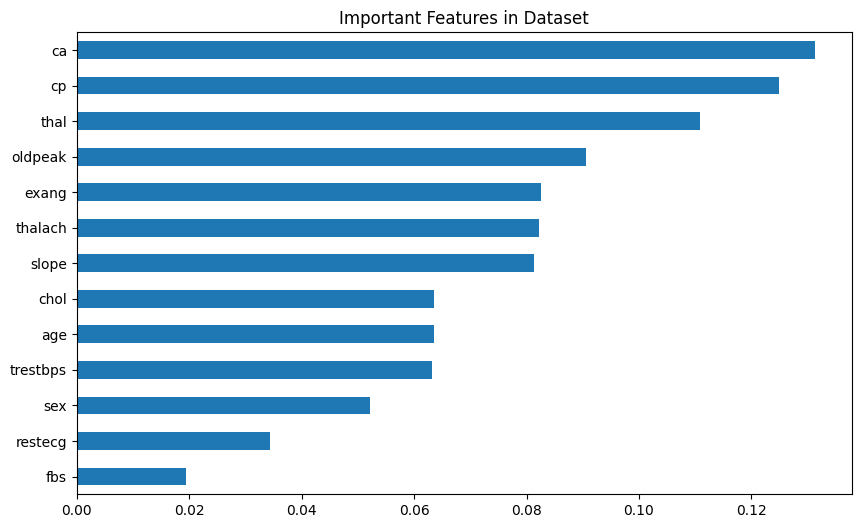

In [129]:
from sklearn.ensemble import ExtraTreesClassifier 
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,Y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

#### Check best 6 features

In [130]:
important_feat=feat_importances.sort_values(ascending=False)[:6]
important_feat

ca         0.131275
cp         0.124938
thal       0.110891
oldpeak    0.090626
exang      0.082494
thalach    0.082177
dtype: float64

 ##### So, We saw that in Both Feature Selection techniques most important feature are following

In [131]:
important_feat_name=important_feat.index
important_feat_name



Index(['ca', 'cp', 'thal', 'oldpeak', 'exang', 'thalach'], dtype='object')

In [132]:
important_feat_name=important_feat.index
important_feat_name

Index(['ca', 'cp', 'thal', 'oldpeak', 'exang', 'thalach'], dtype='object')

##### Accuracy from selected 6 Features

In [133]:
for col in X.columns:
    if col not in important_feat_name:
        X_train.drop(col,axis=1,inplace=True)
        
for col in X.columns:
    if col not in important_feat_name:
        X_test.drop(col,axis=1,inplace=True)

In [134]:
X_train

,cp,thalach,exang,oldpeak,ca,thal
1020,1,164,1,0.0,0,2
479,0,131,1,2.2,3,3
227,2,149,0,0.3,1,2
910,2,163,0,0.6,1,3
362,2,165,0,0.2,0,2
...,...,...,...,...,...,...
700,2,168,0,2.0,0,2
71,0,138,1,1.9,1,3
106,0,173,1,1.6,0,3
270,0,161,0,0.0,0,3


In [135]:
X_test.shape

(308, 6)

In [136]:
X_train.shape

(717, 6)

In [137]:
df_allgo_accuracy

,Model Name,Accuracy
0,SVM Classifier(SVC),0.961039
1,XGBClassifier,0.990260
2,AdaBoostClassifier,0.948052
3,GradientBoostingClassifier,0.990260
4,DecisionTreeClassifier,1.000000
5,RandomForest Classifier,0.980519
6,KNNClassification,0.948052
7,LogisticRegression,0.831169


In [138]:
model_name,after_fs_WO_SC_accuracy=model(X_train,X_test,Y_train,Y_test)
model_name,after_fs_WO_SC_accuracy

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.8474025974025974,
  0.987012987012987,
  0.8344155844155844,
  0.9675324675324676,
  0.9675324675324676,
  0.987012987012987,
  0.9967532467532467,
  0.814935064935065])

In [139]:
df_allgo_accuracy['after_fs_WO_SC_accuracy']=after_fs_WO_SC_accuracy
df_allgo_accuracy

,Model Name,Accuracy,after_fs_WO_SC_accuracy
0,SVM Classifier(SVC),0.961039,0.847403
1,XGBClassifier,0.990260,0.987013
2,AdaBoostClassifier,0.948052,0.834416
3,GradientBoostingClassifier,0.990260,0.967532
4,DecisionTreeClassifier,1.000000,0.967532
5,RandomForest Classifier,0.980519,0.987013
6,KNNClassification,0.948052,0.996753
7,LogisticRegression,0.831169,0.814935


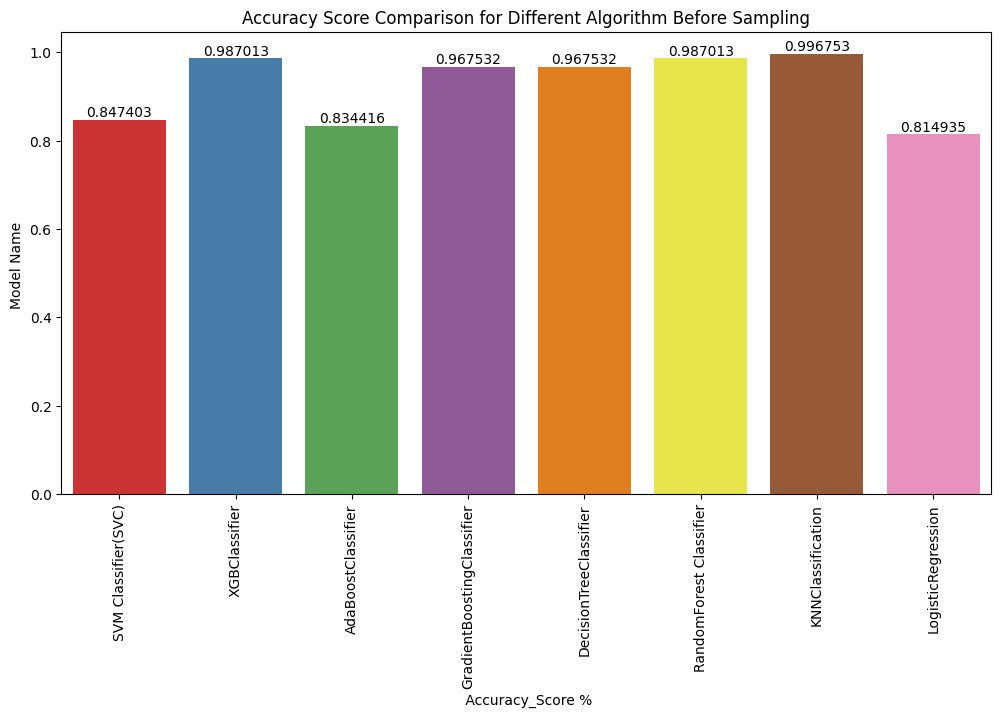

In [140]:
plt.figure(figsize = (12, 6))
ax=sns.barplot(x='Model Name',y='after_fs_WO_SC_accuracy',data=df_allgo_accuracy, palette='Set1')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
    

ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Model Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm Before Sampling")


plt.show()


In [141]:
# df_allgo_accuracy.drop(columns=['after_fs_WO_SC_accuracy'],inplace=True)

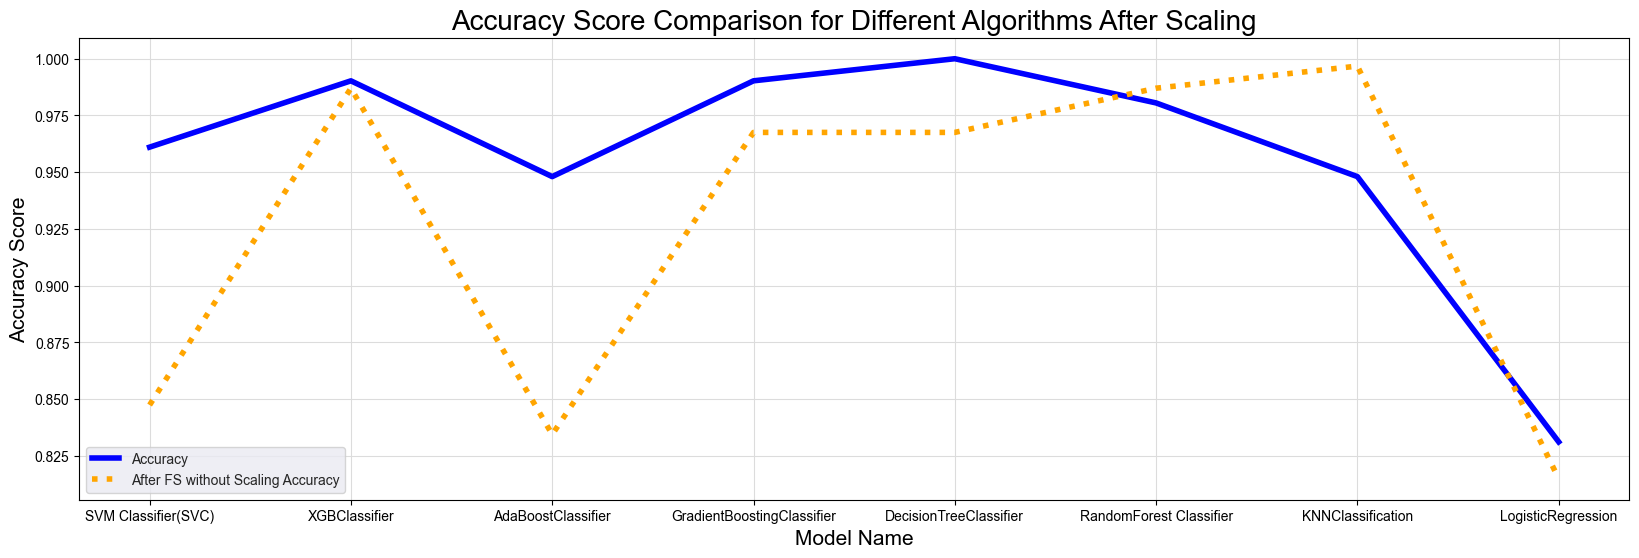

In [142]:
plt.figure(figsize=(20, 6))


ax = sns.lineplot(x='Model Name', y='Accuracy', data=df_allgo_accuracy, linewidth=4,color='blue', label='Accuracy')
ax = sns.lineplot(x='Model Name', y='after_fs_WO_SC_accuracy', data=df_allgo_accuracy, linewidth=4, linestyle=':', color='orange', label='After FS without Scaling Accuracy')


ax.set_xlabel("Model Name", fontsize=15)
ax.set_ylabel("Accuracy Score", fontsize=15)
ax.set_title("Accuracy Score Comparison for Different Algorithms After Scaling", fontsize=20)

ax.grid(color='gainsboro')
sns.set_style("darkgrid")


plt.legend()


plt.show()

## Scalling

##### MinMaxScaler

In [143]:
# Feature Scaling
mmxscaler = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')
colls=[X.columns]
for col in colls:
        X[col]=mmxscaler.fit_transform(X[col])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


<Axes: >

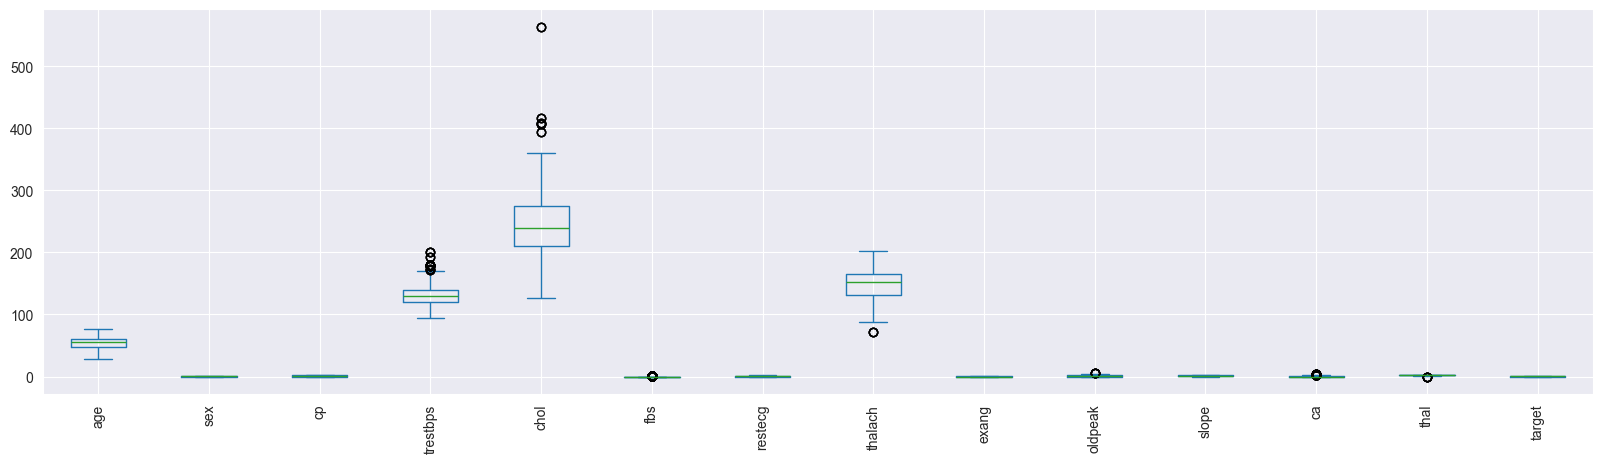

In [144]:
df.plot.box(figsize=(20,5), rot=90)

######  Again Train and Test for Scalling Data 

In [145]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.30,random_state=42)

In [146]:
model_name,after_scalling_accuracy=model(xtrain,xtest,ytrain,ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [147]:
model_name,after_scalling_accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.8084415584415584,
  0.9902597402597403,
  0.9025974025974026,
  0.9805194805194806,
  0.9902597402597403,
  0.9902597402597403,
  1.0,
  0.8084415584415584])

##### Add New Accuracy into Accuracy Dataframe

In [148]:
df_allgo_accuracy['after_scalling_accuracy']=after_scalling_accuracy
df_allgo_accuracy

,Model Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy
0,SVM Classifier(SVC),0.961039,0.847403,0.808442
1,XGBClassifier,0.990260,0.987013,0.990260
2,AdaBoostClassifier,0.948052,0.834416,0.902597
3,GradientBoostingClassifier,0.990260,0.967532,0.980519
4,DecisionTreeClassifier,1.000000,0.967532,0.990260
5,RandomForest Classifier,0.980519,0.987013,0.990260
6,KNNClassification,0.948052,0.996753,1.000000
7,LogisticRegression,0.831169,0.814935,0.808442


##### Lets plot Accuracy Comparison graph again with new accuracy.

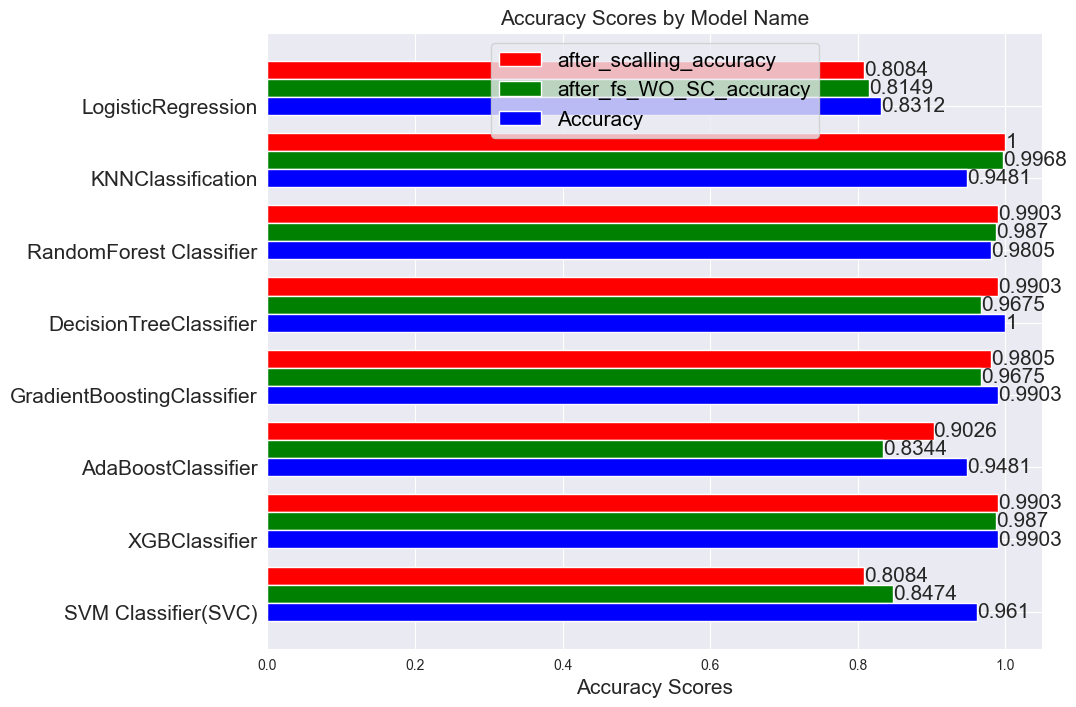

In [149]:
AlgorithmName = df_allgo_accuracy['Model Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))

plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='r')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='g')
plot1 = ax.barh(x , Accuracy, height, label='Accuracy',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Model Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
# fig.tight_layout()

plt.show()

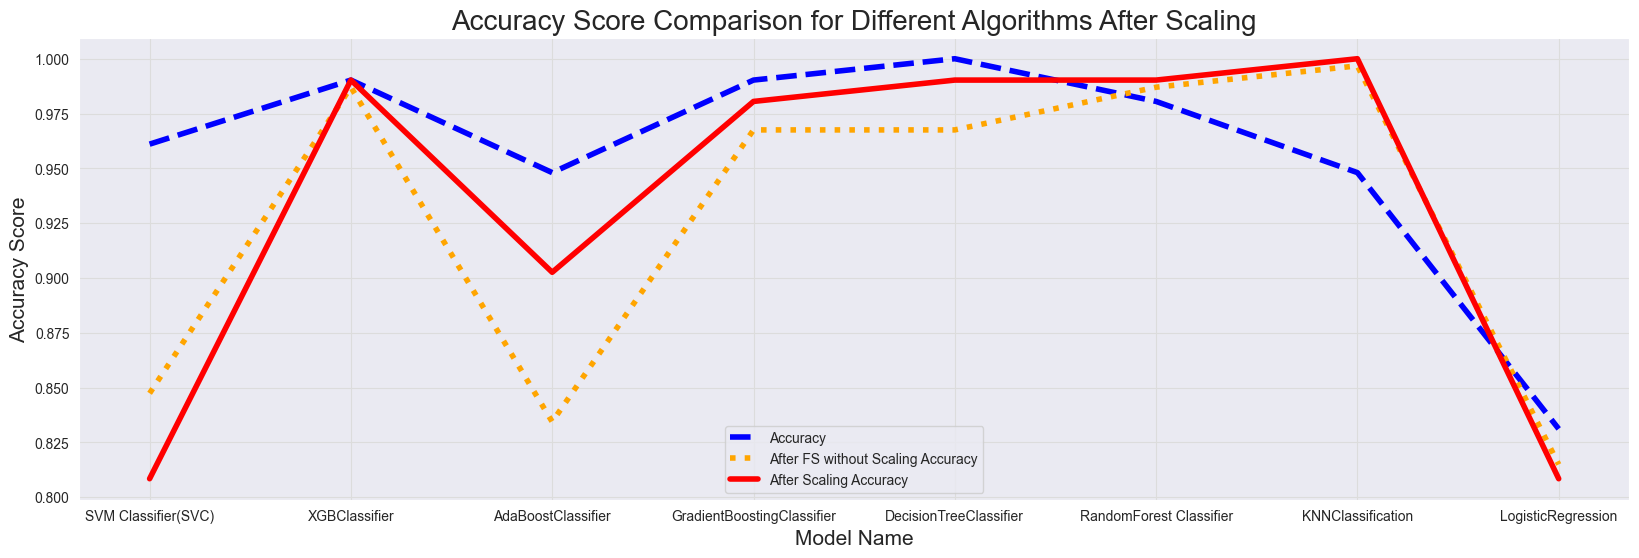

In [150]:
plt.figure(figsize=(20, 6))


ax = sns.lineplot(x='Model Name', y='Accuracy', data=df_allgo_accuracy, linewidth=4, linestyle='--', color='blue', label='Accuracy')
ax = sns.lineplot(x='Model Name', y='after_fs_WO_SC_accuracy', data=df_allgo_accuracy, linewidth=4, linestyle=':', color='orange', label='After FS without Scaling Accuracy')
ax = sns.lineplot(x='Model Name', y='after_scalling_accuracy', data=df_allgo_accuracy, linewidth=4, color='red', label='After Scaling Accuracy')


ax.set_xlabel("Model Name", fontsize=15)
ax.set_ylabel("Accuracy Score", fontsize=15)
ax.set_title("Accuracy Score Comparison for Different Algorithms After Scaling", fontsize=20)

ax.grid(color='gainsboro')
sns.set_style("darkgrid")


plt.legend()


plt.show()

In [151]:
# for scv
svc.fit(xtrain,ytrain)
svc_predict=svc.predict(xtest)
print("Complete SVM Classifier(SVC) !") 

Complete SVM Classifier(SVC) !


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       159
           1       0.84      0.92      0.88       149

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

Confusion Matrix: 
 [[133  26]
 [ 12 137]] 

Accuracy Score:  0.8766233766233766
ROC AUC Score:  0.877970537334853


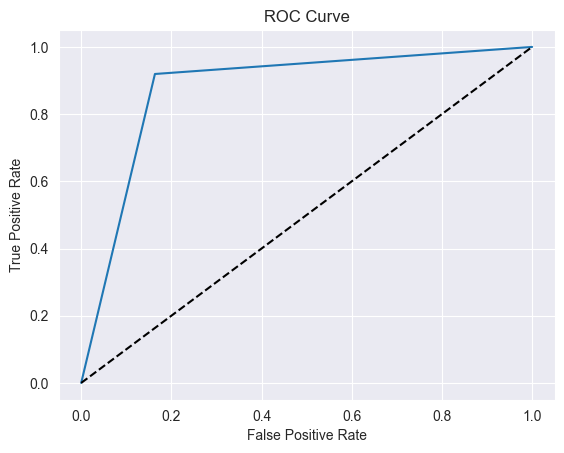

------------------------------------------------------------ 



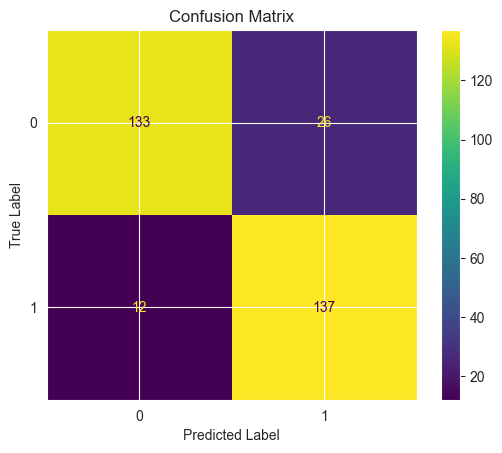

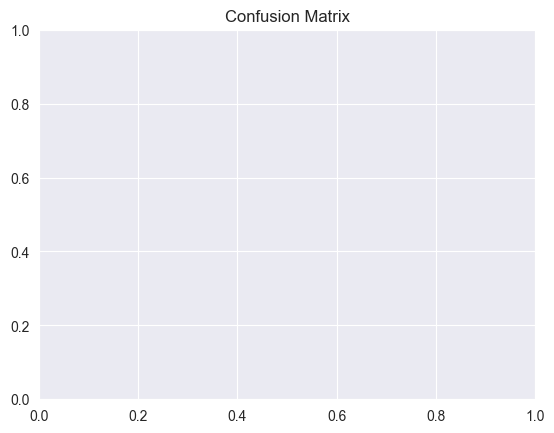

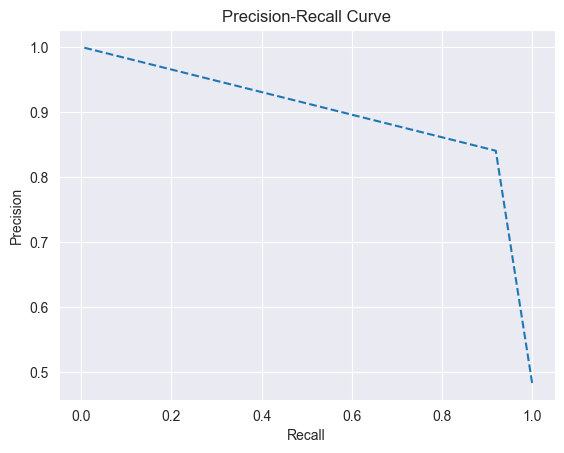

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have defined xtrain, ytrain, xtest, ytest, svc, svc_predict earlier

print(classification_report(ytest, svc_predict))
con_matrix = confusion_matrix(ytest, svc_predict)
print("Confusion Matrix: \n", con_matrix, "\n")
svc_accuracy = accuracy_score(ytest, svc_predict)
print("Accuracy Score: ", svc_accuracy)
svc_auc = roc_auc_score(ytest, svc_predict)
print("ROC AUC Score: ", svc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, svc_predict)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

a = "------"
print(a * 10, "\n")

plot_confusion_matrix(svc, xtest, ytest)
plt.title("Confusion Matrix")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytest, svc_predict)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

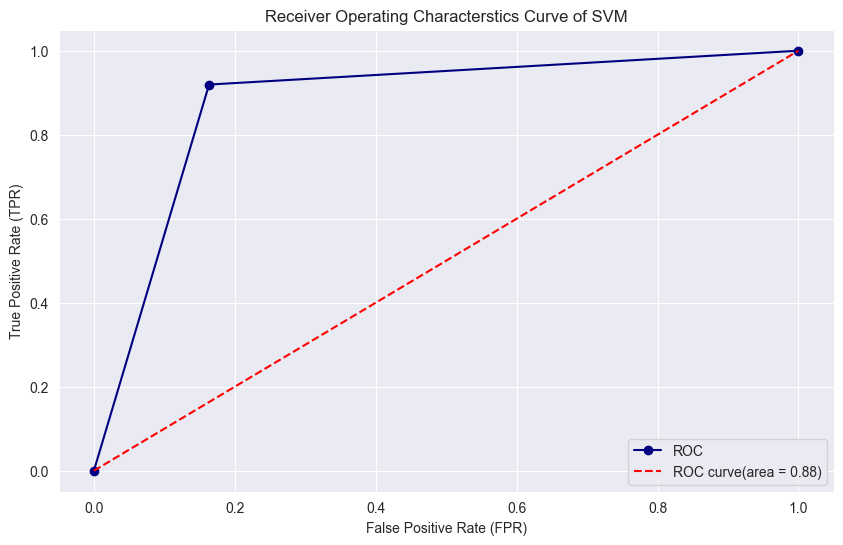

In [153]:
fpr, tpr, thresholds = roc_curve(ytest,svc_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% svc_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

In [154]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.30,random_state=14)

##### Again Feature Selection using "SelectKBest"

In [155]:
#Feature Engineering(FS+Feature Scaling)
#Feature Selection using "SelectKBest"

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x_train,y_train) 

col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
2,cp,180.722756
8,exang,175.543407
7,thalach,163.284728
9,oldpeak,158.666530
11,ca,106.147918
12,thal,99.496132


##### ExtraTreesClassifier

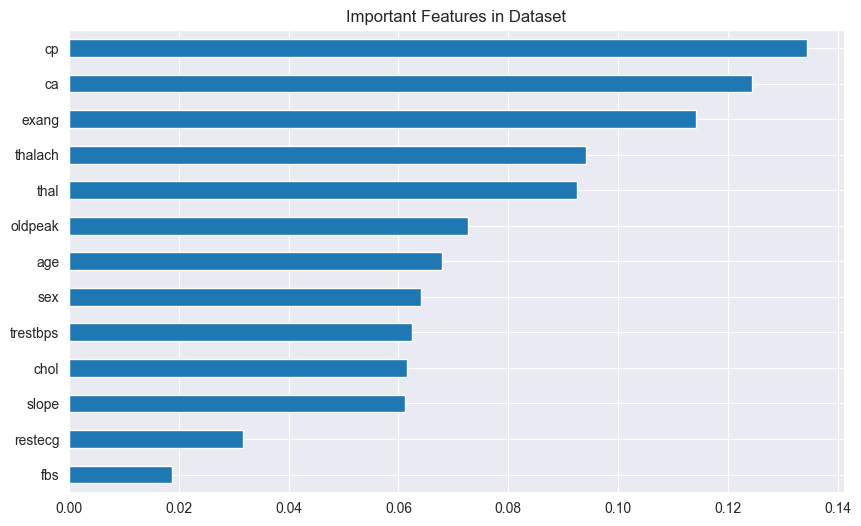

In [156]:
from sklearn.ensemble import ExtraTreesClassifier 
model_ETC = ExtraTreesClassifier()
model_ETC.fit(x_train,y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

In [157]:
important_feat=feat_importances.sort_values(ascending=False)[:6]

In [158]:
important_feat

cp         0.134436
ca         0.124496
exang      0.114244
thalach    0.094171
thal       0.092486
oldpeak    0.072596
dtype: float64

#### So, We saw that in Both Feature Selection techniques most important feature are following

In [159]:
important_feat_name=important_feat.index
important_feat_name

Index(['cp', 'ca', 'exang', 'thalach', 'thal', 'oldpeak'], dtype='object')

##### Make update Train and Test Data for selected best Feature

In [160]:
for col in X.columns:
    if col not in important_feat_name:
        x_train.drop(col,axis=1,inplace=True)

In [161]:
x_train.head()

,cp,thalach,exang,oldpeak,ca,thal
610,0.000000,0.496183,1.0,0.483871,0.00,1.000000
85,0.333333,0.755725,0.0,0.000000,0.00,0.666667
914,0.000000,0.465649,1.0,0.016129,0.25,0.666667
948,0.000000,0.412214,1.0,0.419355,0.00,1.000000
169,0.333333,0.511450,0.0,0.000000,0.00,0.666667


In [162]:
for col in X.columns:
    if col not in important_feat_name:
        x_test.drop(col,axis=1,inplace=True)
        
x_test.head()

,cp,thalach,exang,oldpeak,ca,thal
644,0.666667,0.748092,0.0,0.000000,0.00,0.666667
115,0.000000,0.572519,1.0,0.161290,0.00,1.000000
249,0.666667,0.603053,0.0,0.000000,0.00,0.666667
810,0.000000,0.328244,1.0,0.322581,0.00,1.000000
475,0.666667,0.778626,0.0,0.032258,0.25,1.000000


##### Again Train and Test the model for selected feature

In [163]:
model_name,after_scalling_w_fs_accuracy=model(x_train,x_test,y_train,y_test)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


##### Add New Accuracy into Accuracy Dataframe

In [164]:
df_allgo_accuracy['after_scalling_w_fs_accuracy']=after_scalling_w_fs_accuracy
df_allgo_accuracy

,Model Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy,after_scalling_w_fs_accuracy
0,SVM Classifier(SVC),0.961039,0.847403,0.808442,0.821429
1,XGBClassifier,0.990260,0.987013,0.990260,0.996753
2,AdaBoostClassifier,0.948052,0.834416,0.902597,0.886364
3,GradientBoostingClassifier,0.990260,0.967532,0.980519,0.987013
4,DecisionTreeClassifier,1.000000,0.967532,0.990260,0.983766
5,RandomForest Classifier,0.980519,0.987013,0.990260,0.987013
6,KNNClassification,0.948052,0.996753,1.000000,0.996753
7,LogisticRegression,0.831169,0.814935,0.808442,0.827922


#### Lets plot Accuracy Comparison graph again with new accuracy

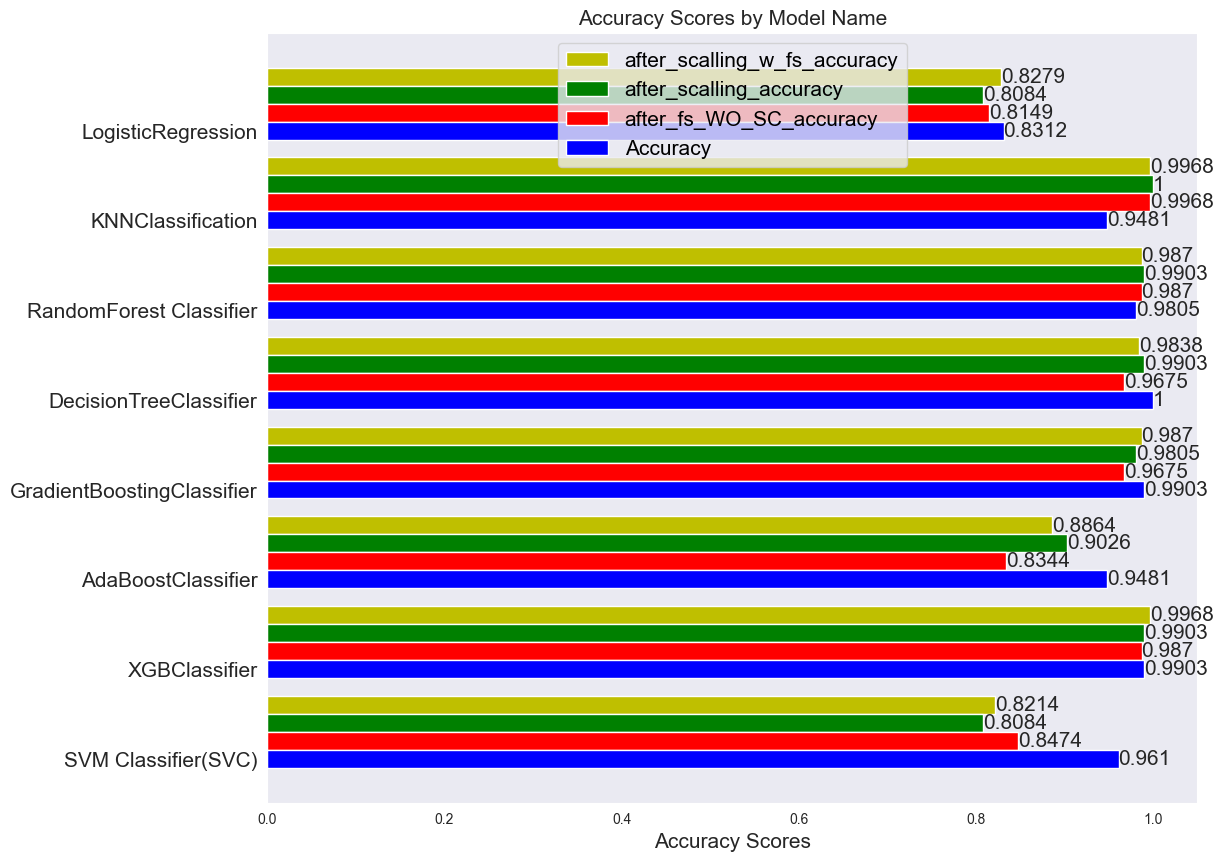

In [165]:
AlgorithmName = df_allgo_accuracy['Model Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)
after_scalling_w_fs_accuracy = df_allgo_accuracy['after_scalling_w_fs_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.20  # the height of the bars

fig, ax = plt.subplots(figsize=(12,10))

plot4 = ax.barh(x + height+height+height, after_scalling_w_fs_accuracy, height, label='after_scalling_w_fs_accuracy',color='y')
plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='g')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='r')
plot1 = ax.barh(x, Accuracy, height, label='Accuracy',color='b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Model Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)
ax.grid()

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
ax.bar_label(ax.containers[3],fontsize= 15)

plt.show()

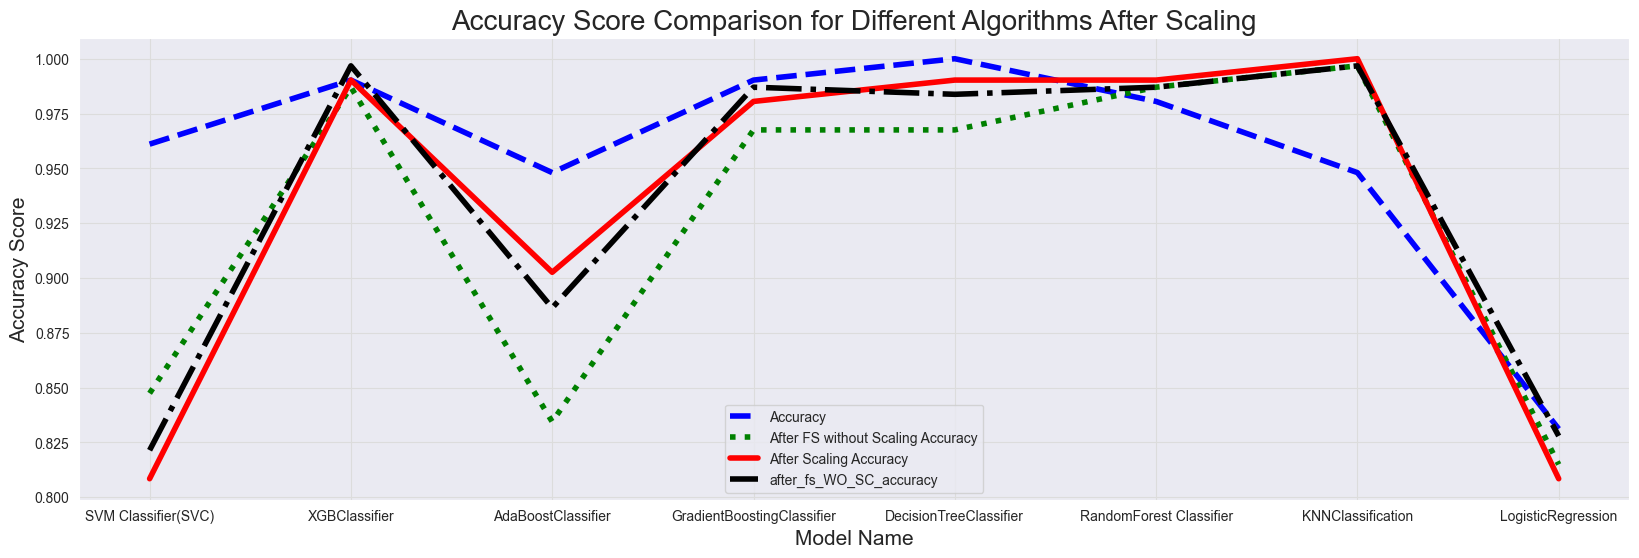

In [166]:
plt.figure(figsize=(20, 6))


ax = sns.lineplot(x='Model Name', y='Accuracy', data=df_allgo_accuracy, linewidth=4, linestyle='--', color='blue', label='Accuracy')
ax = sns.lineplot(x='Model Name', y='after_fs_WO_SC_accuracy', data=df_allgo_accuracy, linewidth=4, linestyle=':', color='green', label='After FS without Scaling Accuracy')

ax = sns.lineplot(x='Model Name', y='after_scalling_accuracy', data=df_allgo_accuracy, linewidth=4, color='red', label='After Scaling Accuracy')
ax = sns.lineplot(x='Model Name', y='after_scalling_w_fs_accuracy', data=df_allgo_accuracy, linewidth=4,linestyle='-.', color='black', label='after_fs_WO_SC_accuracy')


ax.set_xlabel("Model Name", fontsize=15)
ax.set_ylabel("Accuracy Score", fontsize=15)
ax.set_title("Accuracy Score Comparison for Different Algorithms After Scaling", fontsize=20)

ax.grid(color='gainsboro')
sns.set_style("darkgrid")


plt.legend()


plt.show()

##  Analysis Summary

#### We observed from above Accuracy Score Comparison that, XGBClassifier algorithm has perform better accuracy after scalling, that is 99.68%. But Before Scalling and Feature Selection XGBClassifier perform almost same accuracy with 99.02%. So Finally we can use XGBClassifier for our final model.

In [167]:
X=df.drop('target',axis=1)
Y=df['target']
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=14)
Xtrain.shape


(717, 13)

 ##### XGBClassifier

In [168]:
xg =XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
}

final_model_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
final_model_xg.fit(Xtrain, Ytrain)

best_xg = final_model_xg.best_estimator_

xg_predict = best_xg.predict(Xtest)

print("Best Hyperparameters:", final_model_xg.best_params_)
print("Confusion Matrix:\n", confusion_matrix(Ytest, xg_predict))
print("Accuracy:\n", accuracy_score(Ytest, xg_predict))
print("Classification Report:\n", classification_report(Ytest, xg_predict))
accuracy_list.append(accuracy_score(Ytest, knn_predict))
model_list.append(xgbgrid_search)
accuracy_list.append(100)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
Confusion Matrix:
 [[151   0]
 [  3 154]]
Accuracy:
 0.9902597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       157

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



              precision    recall  f1-score   support

           0       0.98      1.00      0.99       151
           1       1.00      0.98      0.99       157

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

Confusion Matrix: 
 [[151   0]
 [  3 154]] 

Accuracy Score:  0.9902597402597403
ROC AUC Score:  0.9904458598726115


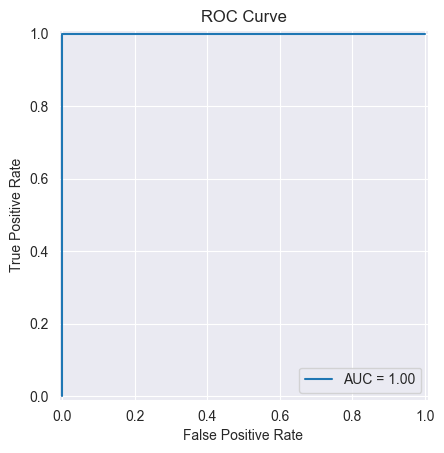

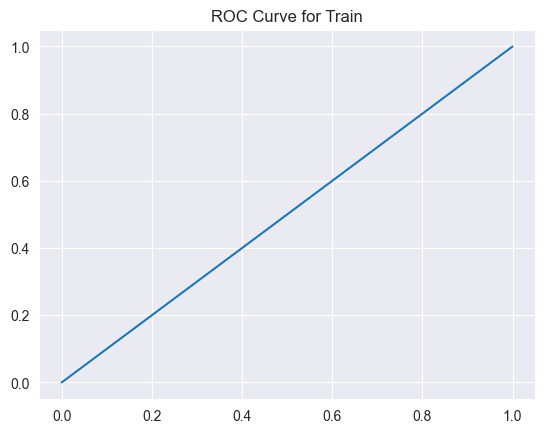

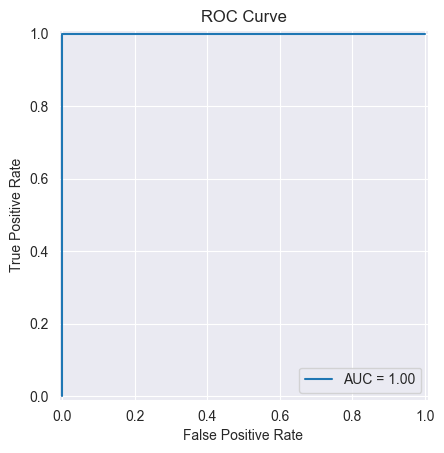

------------------------------------------------------------ 



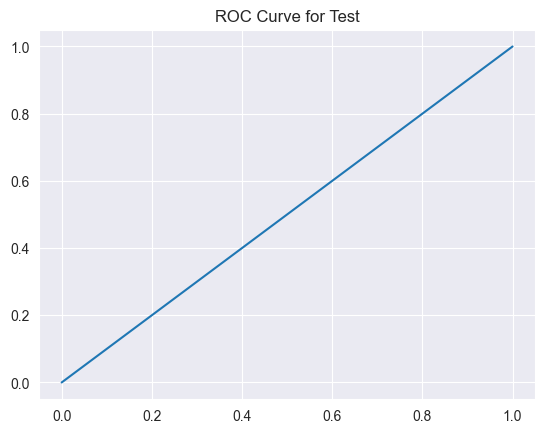

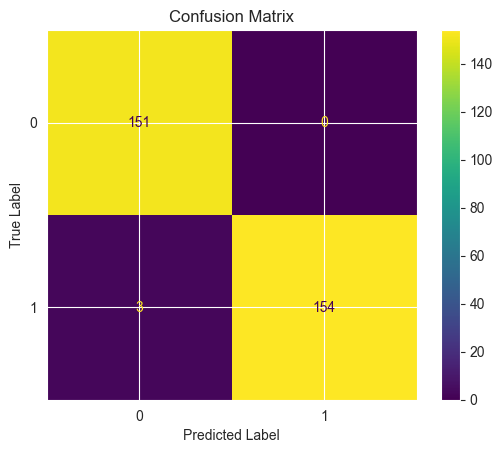

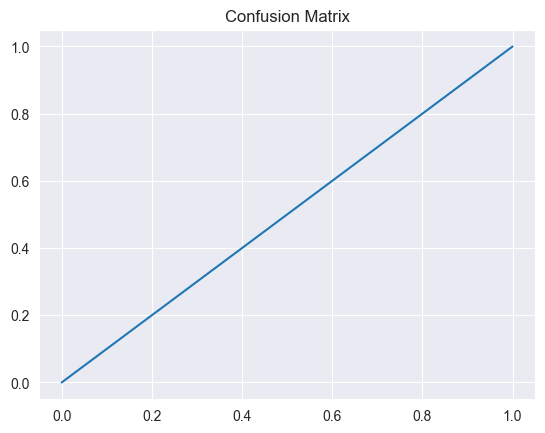

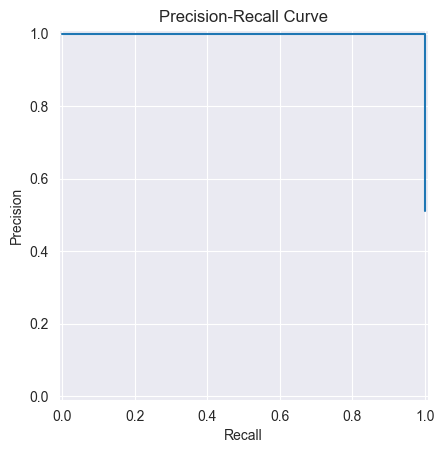

Text(0.5, 1.0, 'Precision Recall Curve')

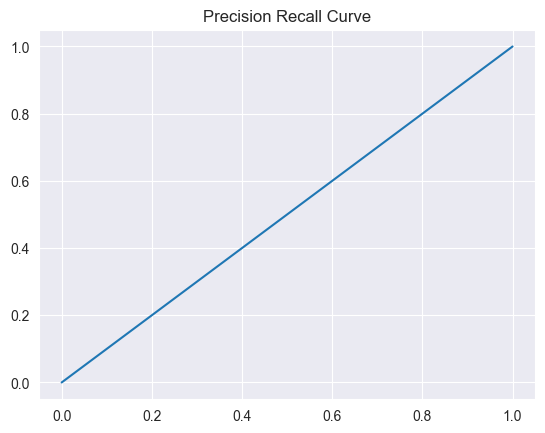

In [170]:
print(classification_report(Ytest, xg_predict))

# Confusion Matrix
con_matrix = confusion_matrix(Ytest, xg_predict)
print("Confusion Matrix: \n", con_matrix, "\n")

# Accuracy Score
xg_accuracy = accuracy_score(Ytest, xg_predict)
print("Accuracy Score: ", xg_accuracy)

# ROC AUC Score
xg_auc = roc_auc_score(Ytest, xg_predict)
print("ROC AUC Score: ", xg_auc)

# ROC Curve for Train
plot_roc_curve(final_model_xg, Xtrain, Ytrain)
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve for Train")

# ROC Curve for Test
plot_roc_curve(final_model_xg, Xtest, Ytest)
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve for Test")

# Confusion Matrix
a = "------"
print(a * 10, "\n")
plot_confusion_matrix(final_model_xg, Xtest, Ytest)
plt.plot([0, 1], [0, 1])
plt.title("Confusion Matrix")

# Precision Recall Curve
plot_precision_recall_curve(final_model_xg, Xtest, Ytest)
plt.plot([0, 1], [0, 1])
plt.title("Precision Recall Curve")

## Model Save and Revalidate

In [171]:
# save, final model=final_model_xg ,y_pred=xg_predict 
import pickle

try:
    with open('model.pkl', 'wb') as file:
        pickle.dump(final_model_xg, file)
    print("Model saved successfully")
except Exception as e:
    print("Error occurred while saving the model:", e)    
    
try:
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully")
except FileNotFoundError:
    print("File not found:")
except Exception as e:
    print("Error occurred while loading the model:", e)
    
    

Model saved successfully
Model loaded successfully


In [172]:
result = model.score(Xtest, Ytest)
print("Final Model Accuracy: ",result)

Final Model Accuracy:  0.9902597402597403


In [173]:
# example 1
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slope':2, 'ca':0, 'thal':3},index=[0])

#prediction1
prediction1 = model.predict(newdata)
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3


In [174]:
print(prediction1)

if (prediction1[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


 ## Conclusion

 #### In summary, early detection of heart disease is crucial for saving lives and reducing healthcare costs. Machine learning offers a powerful tool for analyzing medical data and diagnosing illnesses, thanks to the increasing availability of large datasets and the decreasing cost of data storage. Using an XGBClassifier, I built a model using a dataset from The kaggle containing 1054 individuals, both with and without heart disease. The model achieved an accuracy of 99.02% with hyperparameter tunning. This highlights the potential of machine learning in healthcare, where traditional diagnostic methods may be costly and less efficient. By leveraging big data, machine learning models can provide valuable insights for disease diagnosis and improve patient outcomes.
